# Local fluctuations and flow at different time
We learned from the previous calculations that the divergence of cv is much larger than the convection term. However, the correlation between divergence of cv and LDF is small. In this one, time difference is introduced. If there is a delay in the response of flow to concentration, or the opposite, the time difference may enhance the correlation.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import corrLib
from skimage import io
import os
from corr_utils import *
import time
from myImageLib import dirrec
from scipy.signal import savgol_filter
import typesetting.main as tm
tm.prl('1-column-2-panel')
import cv2
from miscLib import label_slope

## 1. One frame correlation
Correlate divcn at 3000, with LDF ranging from 2500 to 3500 (33 seconds in total).

Text(0, 0.5, 'correlation')

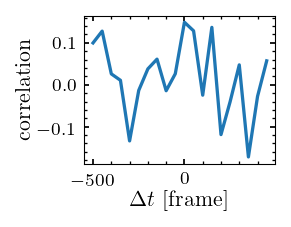

In [16]:
n = 3000
ranges = 500
divcn = np.load(r'D:\density_fluctuations\08032020\flow_derivs\01\divcn\{0:04d}-{1:04d}.npy'.format(n, n+1))
corr_list = []
t_list = []
for i in range(n-ranges, n+ranges, 50):
    df = np.load(r'D:\density_fluctuations\08032020\local_df\01\{:04d}.npy'.format(i))
    corr = corr2d(divcn, df)
    corr_list.append(corr)
    t_list.append(i-n)
plt.plot(t_list, corr_list)
plt.xlabel('$\Delta t$ [frame]')
plt.ylabel('correlation')